<a href="https://colab.research.google.com/github/mekha1278/python-practices/blob/main/titanic_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df=pd.read_csv('/content/Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


handling missing values to prepare data for analysis

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Age:filled using median value beacuse its numerical and can have outliers

In [ ]:
median_age=df['Age'].median()
df['Age']=df['Age'].fillna(median_age)

Cabin:dropped cabin since too many entries are missinng

In [ ]:
df.drop('Cabin',axis=1,inplace=True)

In [ ]:
#missing embarked values with the mode
most_common_embarked=df['Embarked'].mode()[0]
df['Embarked']=df['Embarked'].fillna(most_common_embarked)

In [ ]:
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


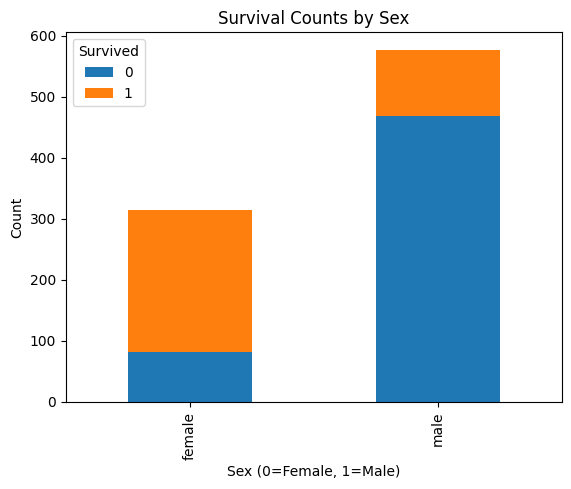

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/Titanic-Dataset.csv')

survival_sex = df.groupby(['Sex', 'Survived']).size().unstack()

survival_sex.plot(kind='bar', stacked=True)
plt.title('Survival Counts by Sex')
plt.xlabel('Sex (0=Female, 1=Male)')
plt.ylabel('Count')
plt.show()


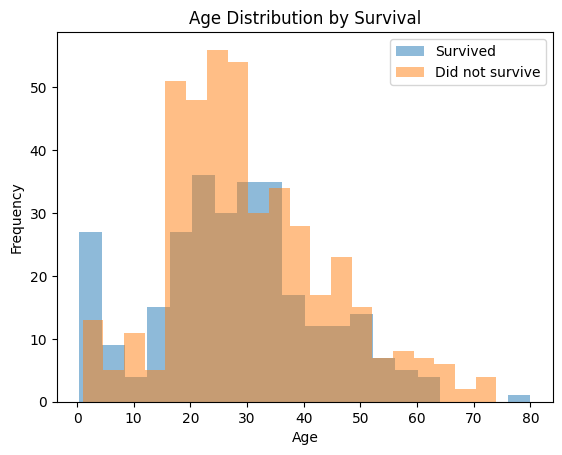

In [6]:
# Plot histograms of Age for survived and not survived
df[df['Survived'] == 1]['Age'].plot(kind='hist', alpha=0.5, bins=20, label='Survived')
df[df['Survived'] == 0]['Age'].plot(kind='hist', alpha=0.5, bins=20, label='Did not survive')

plt.legend()
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.show()


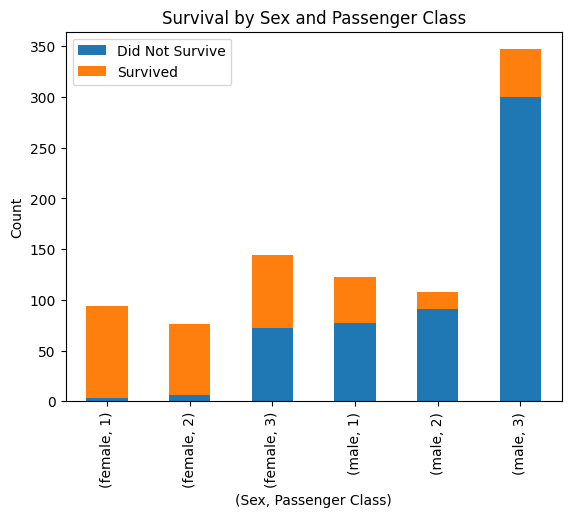

In [7]:
# Cross tab of survival by Sex and Pclass
survival_sex_pclass = pd.crosstab(index=[df['Sex'], df['Pclass']], columns=df['Survived'])

survival_sex_pclass.plot(kind='bar', stacked=True)
plt.title('Survival by Sex and Passenger Class')
plt.xlabel('(Sex, Passenger Class)')
plt.ylabel('Count')
plt.legend(['Did Not Survive', 'Survived'])
plt.show()


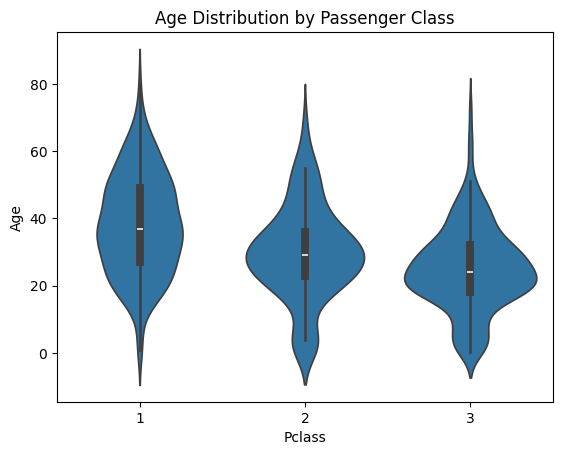

In [8]:
import seaborn as sns

# Violin plot for age distribution across passenger classes
sns.violinplot(x='Pclass', y='Age', data=df)
plt.title('Age Distribution by Passenger Class')
plt.show()


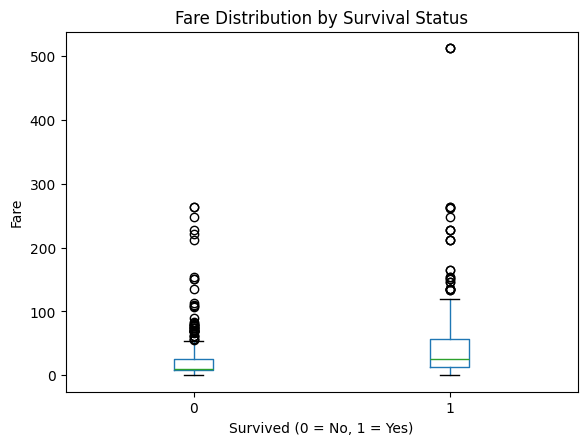

In [9]:
# Box plot for fare distribution among survivors and non-survivors
df.boxplot(column='Fare', by='Survived', grid=False)
plt.title('Fare Distribution by Survival Status')
plt.suptitle('')  # to remove default title
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Fare')
plt.show()


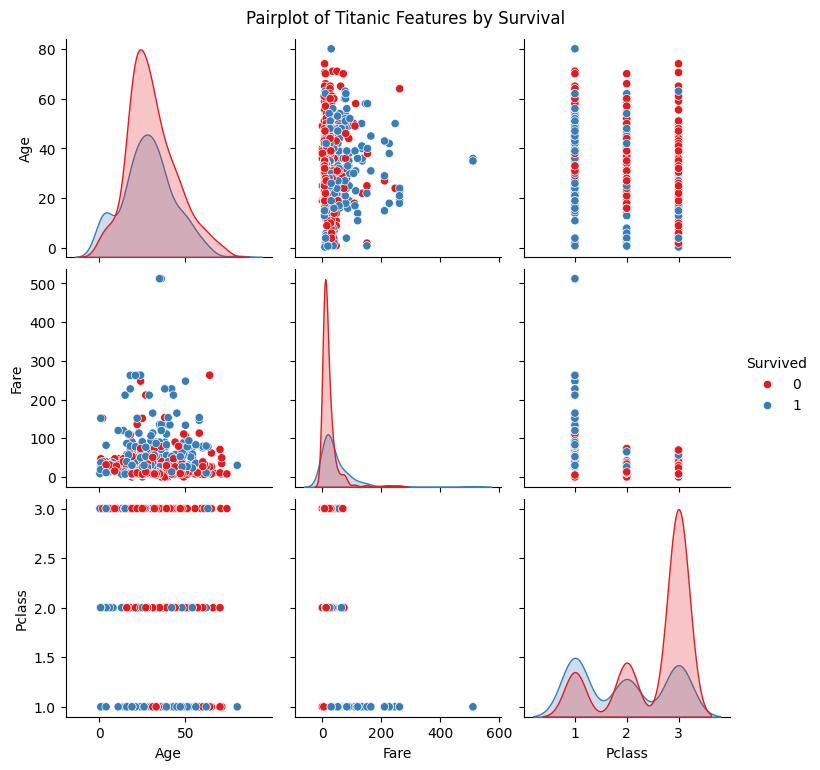

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns only
cols = ['Age', 'Fare', 'Pclass', 'Sex']

sns.pairplot(df[cols + ['Survived']], hue='Survived', palette='Set1')
plt.suptitle('Pairplot of Titanic Features by Survival', y=1.02)
plt.show()



